In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, '../../wildlife-datasets/')

import timm
import torch
import torchvision.transforms as T
import numpy as np
import pandas as pd

from wildlife_datasets import datasets, loader, analysis
from wildlife_tools.data import WildlifeDataset
from wildlife_tools.features import DeepFeatures
from PIL import Image
from urllib.request import urlopen
from timm import create_model

c:\Users\sadda\Downloads\Github\wildlife-datasets\venv_wt\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# NOVA FUNKCIONALITA
import copy

class WD(WildlifeDataset):
    def plot_grid(self, **kwargs):
        self_copy = copy.deepcopy(self)
        self_copy.transform = None
        self_copy.load_label = False
        loader = lambda k: self_copy.__getitem__(k)
        return analysis.plot_grid(self.metadata, self.root, **kwargs, loader=loader)

In [12]:
#dataset_name = datasets.ATRW
#dataset_name = datasets.MacaqueFaces
dataset_name = datasets.FriesianCattle2015

root = '../data/' + dataset_name.__name__
dataset_name.get_data(root)
model = create_model("hf-hub:BVRA/wildlife-mega-L-384", pretrained=True)

DATASET FriesianCattle2015: DOWNLOADING STARTED.
You are trying to download an already downloaded dataset.
        This message may have happened to due interrupted download or extract.
        To force the download use the `force=True` keyword such as
        get_data(..., force=True) or download(..., force=True).
        


In [13]:
metadata = dataset_name(root)

transform = T.Compose([
    T.Resize(size=(384, 384)),
    T.ToTensor(),
    T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
])

dataset = WD(metadata.df, metadata.root, transform=transform)

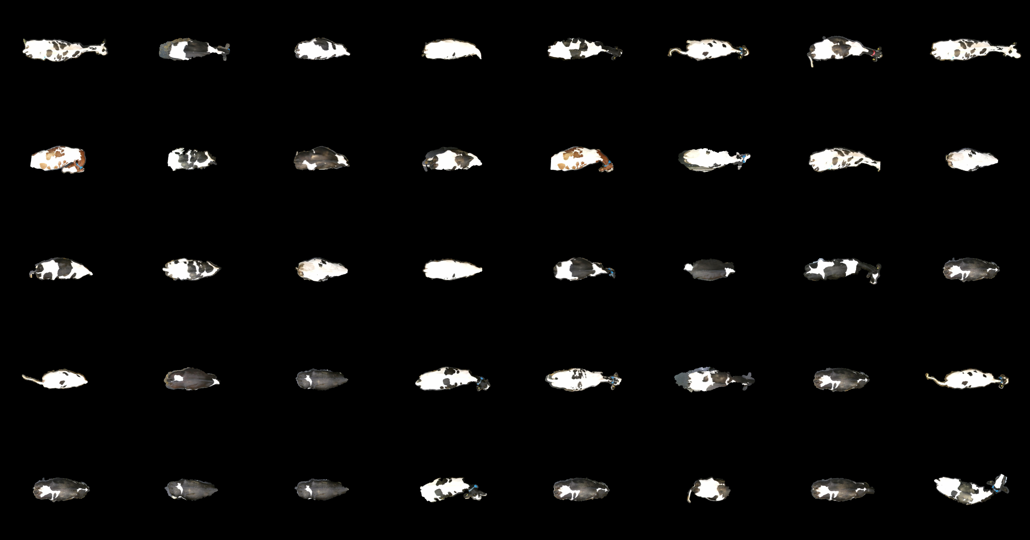

In [14]:
dataset.plot_grid()

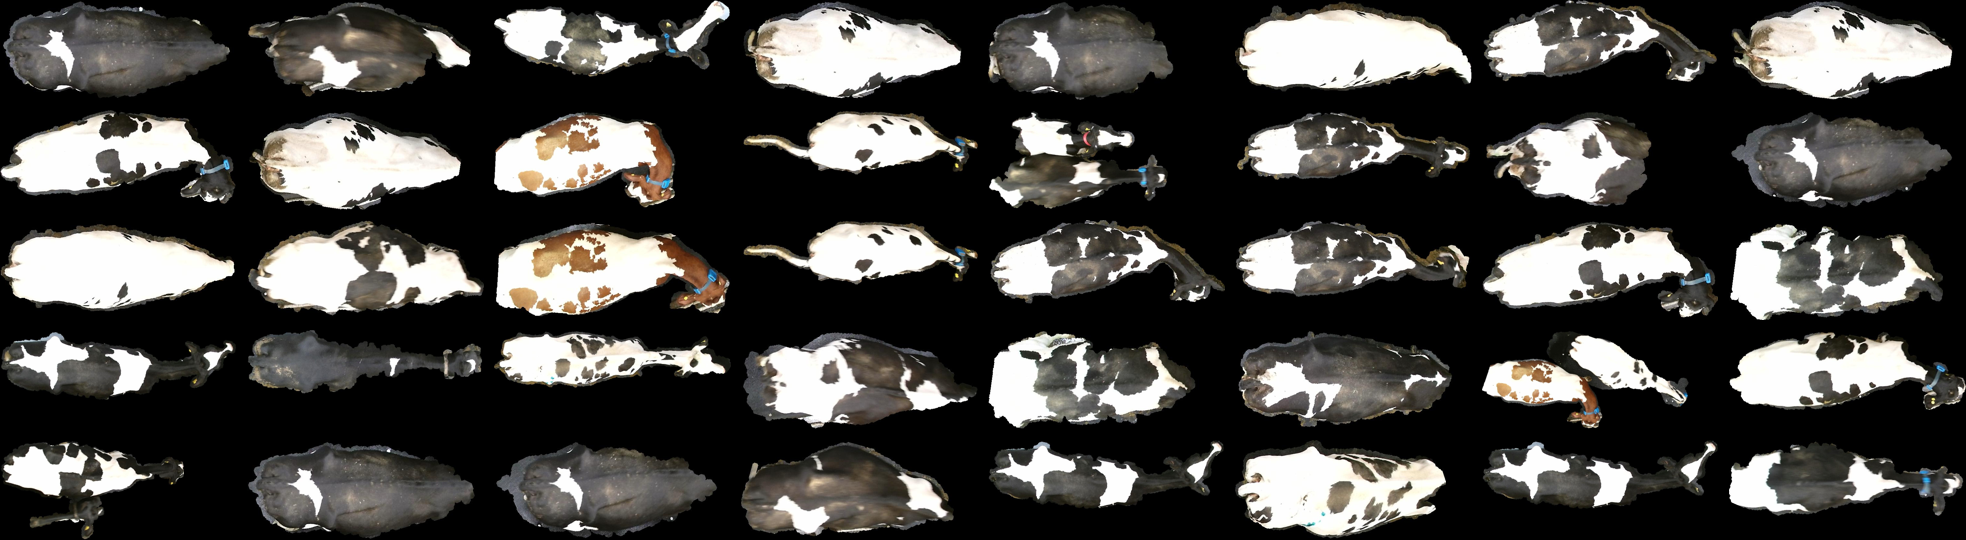

In [15]:
dataset = WD(metadata.df, root, img_load="crop_black", transform=transform)
dataset.plot_grid()

In [16]:
dataset = WD(metadata.df, root, img_load="crop_black", transform=transform)
extractor = DeepFeatures(model, device='cpu', batch_size=16)
#features = extractor(dataset)
#np.save('../data/features.npy', features)

In [17]:
features = np.load('../data/features.npy')

## Pripad 1

database = query

In [18]:
from wildlife_tools.similarity import CosineSimilarity
from wildlife_tools.inference import KnnClassifier

matcher = CosineSimilarity()
similarity = matcher(query=features, database=features)['cosine']
#preds = KnnClassifier(k=1, database_labels=database.labels_string)(similarity['cosine'])

In [19]:
k = 6

np.fill_diagonal(similarity, -1)
idx = (-similarity).argsort(axis=-1)[:, :k]

In [20]:
idx_plot = [np.concatenate(([i, -1], idx[i])) for i in range(5)]

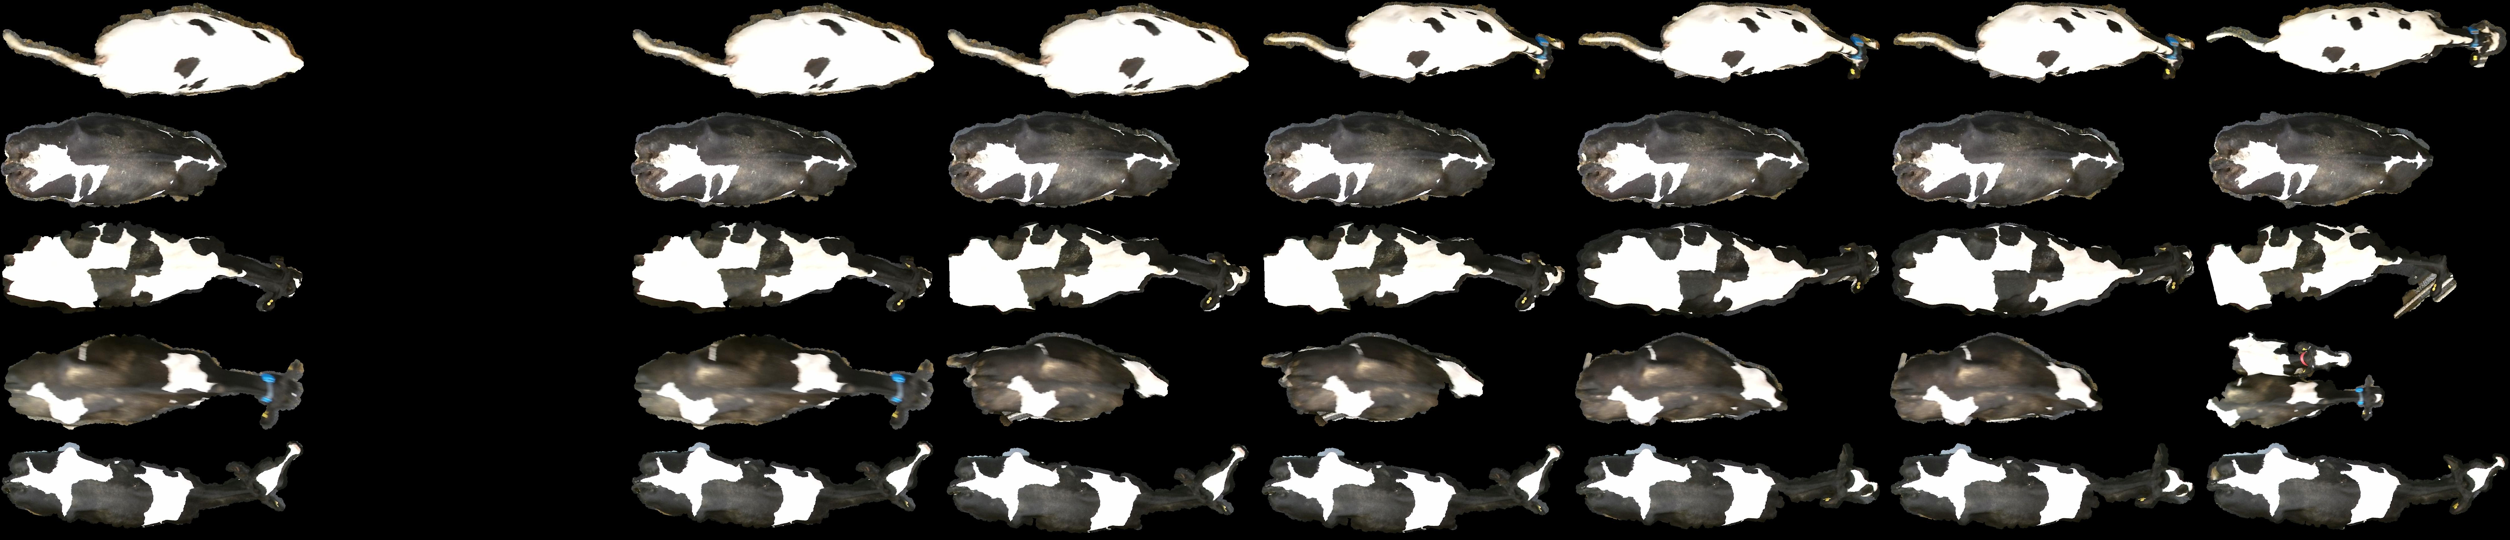

In [21]:
dataset.plot_grid(idx=idx_plot, n_cols=8)

In [22]:
pred = [dataset.metadata['identity'].iloc[idx[i]].values for i in range(len(idx[:5]))]
pred

[array([22, 32, 22, 32, 16, 22]),
 array([9, 9, 9, 9, 9, 9]),
 array([12, 26, 12, 12, 26, 12]),
 array([3, 3, 3, 3, 3, 3]),
 array([2, 2, 2, 2, 2, 2])]

## Pripad 2

database != query

# Poznani spatnych labelu

In [25]:
from wildlife_tools.similarity import CosineSimilarity
from wildlife_tools.inference import KnnClassifier

matcher = CosineSimilarity()
similarity = matcher(query=features, database=features)['cosine']
#preds = KnnClassifier(k=1, database_labels=database.labels_string)(similarity['cosine'])

k = 10

np.fill_diagonal(similarity, -1)
idx = (-similarity).argsort(axis=-1)[:, :k]
pred = [dataset.metadata['identity'].iloc[idx[i]].values for i in range(len(idx))]

In [54]:
for y_true, y_pred in zip(dataset.metadata['identity'], pred):
    pred_counts = pd.Series(y_pred).value_counts()
    for i in range(len(pred_counts)):
        if pred_counts.iloc[i] < 5:
            break
        if pred_counts.index[i] != y_true:
            print(y_pred, pred_counts.index[i], y_true)



[12 26 12 12 26 12 26 12 26 12] 12 26
[12 26 12 26 12 12 26 12 26 12] 12 26
[12 26 12 26 12 26 12 26 12 12] 12 26
[19 15 19 19 15 15 19 15 19 15] 19 15
[19 19 15 19 15 15 19 19 15 15] 19 15
[12 26 12 12 26 26 12 26 12 12] 12 26
[11 23 23 11 23 11 23 11 11 23] 11 27
[11 23 23 11 23 11 23 11 11 23] 23 27
[12 29 12 29 26 12 26 12 26 12] 12 26
[21 21 17 21 17 17 31 21 31 21] 21 17
[13 25 13 25 13 28 25 13 13 25] 13 25
[23 11 11 23 11 23 23 11 11 23] 23 27
[23 11 11 23 11 23 23 11 11 23] 11 27
[26 29 12 26 26 29 12 26 12 26] 26 12
[18 20 18 20 33 20 18 20 18 20] 20 33
[14 14 24 24 14 24 14 14 24 14] 14 24
[12 12 26 12 26 26 12 26 12 29] 12 26
[26 26 12 12 26 26 12 26 12 12] 26 12
[27 11 11 23 11 23 23 11 11 23] 11 23
[18 20 18 18 20 33 33 20 18 18] 18 20
[26 26 12 12 26 12 26 12 26 26] 26 12
[27 11 23 11 23 11 11 23 11 23] 11 23
[14 24 14 24 14 14 24 14 24 14] 14 24
[19 19 15 19 15 19 15 15 19 19] 19 15
[13 25 13 25 13 25 25 13 13 25] 13 28
[13 25 13 25 13 25 25 13 13 25] 25 28
[14 14 24 24

In [63]:
import hashlib

dataset = WD(metadata.df, metadata.root, load_label=False)
hashes = []
for i in range(len(dataset)):
    im = dataset[i]
    hashes.append(hashlib.md5(im.tobytes()).hexdigest())
dataset.metadata['hash'] = hashes

In [69]:
df = dataset.metadata
for _, df_red in df.groupby('hash'):
    if len(df_red) > 1:
        display(df_red)

,image_id,identity,path,split,hash
116,4c8e863b593c05cf,9,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow9\c...,train,00bf4af8ca420e4f0141cd287d9e4d08
291,cbc113bbb1b733bc,9,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow9\co...,test,00bf4af8ca420e4f0141cd287d9e4d08


,image_id,identity,path,split,hash
132,58abed4843fb99eb,3,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow3\c...,train,0217e8bed669152477c0e1e27f2096ab
375,ffad079e26205e82,3,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow3\co...,train,0217e8bed669152477c0e1e27f2096ab


,image_id,identity,path,split,hash
166,6bb4fde96a4d0c97,25,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow25\c...,train,02e9d9ae9232613fa530295b7d7ef3ba
192,823141fe7690274f,13,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow13\c...,train,02e9d9ae9232613fa530295b7d7ef3ba


,image_id,identity,path,split,hash
191,81f92b1d47b84b6c,7,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow7\c...,train,041b6325074d04a6a270fb884bcca235
288,c64c71dd2ffe9abe,7,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow7\co...,train,041b6325074d04a6a270fb884bcca235


,image_id,identity,path,split,hash
31,192a47a483201bb8,8,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow8\c...,train,059ff1121f1f95f19738f42b0b249bcb
306,d37ca67c9304bc3a,8,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow8\co...,train,059ff1121f1f95f19738f42b0b249bcb


,image_id,identity,path,split,hash
87,3e8d81681ddc19cc,7,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow7\co...,train,05ecd2de704f981ced2a87bfdfd72dd3
141,5d8c499dec90645f,7,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow7\c...,train,05ecd2de704f981ced2a87bfdfd72dd3


,image_id,identity,path,split,hash
133,59a6caa8d221bc5f,15,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow15\c...,test,06f923187fe1c56b6c96081326f99de7
374,fd18683decc3a16a,19,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow19\c...,train,06f923187fe1c56b6c96081326f99de7


,image_id,identity,path,split,hash
61,2d5efee3d2b0622a,8,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow8\c...,train,08018c30a6a9b4a5a8519b5d76ddbd7e
344,e74bba93b65e6ed5,8,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow8\co...,train,08018c30a6a9b4a5a8519b5d76ddbd7e


,image_id,identity,path,split,hash
81,3a21f8babec148ab,1,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow1\c...,train,092fde75baa5893432e28e225225a5e0
203,8f1eea1a6e461e81,1,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow1\co...,train,092fde75baa5893432e28e225225a5e0


,image_id,identity,path,split,hash
19,0de0776e660e8a73,15,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow15\c...,train,0ea1016c92a98d993ae610e7ca5e853a
258,b27878525ad6c05c,19,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow19\c...,train,0ea1016c92a98d993ae610e7ca5e853a


,image_id,identity,path,split,hash
37,1ab115a70e33dde8,9,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow9\co...,train,112224699268f38fe0b3cfa274769cf2
297,cdfd98ec7ad24b47,9,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow9\c...,train,112224699268f38fe0b3cfa274769cf2


,image_id,identity,path,split,hash
187,7bfdde8c1afc588b,21,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow21\c...,train,11d4f0977eaddb7e53e4554b443112c3
230,9eaa70e30a292db0,17,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow17\c...,test,11d4f0977eaddb7e53e4554b443112c3


,image_id,identity,path,split,hash
147,5f1f4922621895e2,5,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow5\c...,train,12967b1a72458547b8d4786d38ada9ca
331,e25ab41c68d9275b,5,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow5\co...,test,12967b1a72458547b8d4786d38ada9ca


,image_id,identity,path,split,hash
109,49dd2bdde313344d,4,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow4\co...,train,12fc41f904c5a54b1f872c2dee6e1880
260,b313328859b2f4b3,4,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow4\c...,train,12fc41f904c5a54b1f872c2dee6e1880


,image_id,identity,path,split,hash
224,9bed9d8917e58b8f,8,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow8\c...,train,185ef991af4d8cd36a2a5b8992ad0a5e
369,fa184f575b243058,8,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow8\co...,train,185ef991af4d8cd36a2a5b8992ad0a5e


,image_id,identity,path,split,hash
50,2482a7d906b53d8b,8,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow8\co...,train,18b51c9bdad56ea9cd5ba18d0aa08934
351,ebafa8f7d12498b4,8,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow8\c...,train,18b51c9bdad56ea9cd5ba18d0aa08934


,image_id,identity,path,split,hash
110,4a67d76ec1a37f8c,23,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow23\c...,train,2038e8481414326aa7859ddd667d3f8d
278,c10e333777dffc94,11,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow11\c...,train,2038e8481414326aa7859ddd667d3f8d


,image_id,identity,path,split,hash
66,2f565b9630d48cc8,1,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow1\c...,test,209afb8bfcc824dbc2a9e1a0333fea88
298,ceeb55e911f207a4,1,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow1\co...,train,209afb8bfcc824dbc2a9e1a0333fea88


,image_id,identity,path,split,hash
52,255de77da952e676,26,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow26\c...,train,2414aff0f6e6e8aee0ac27a08ce3994d
204,8f5d68d60cb2818d,12,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow12\c...,test,2414aff0f6e6e8aee0ac27a08ce3994d


,image_id,identity,path,split,hash
152,62799cae02289d01,24,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow24\c...,train,25166a9dbc9364a0001aba22f923146a
280,c2bd9b109e7a8b42,14,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow14\c...,train,25166a9dbc9364a0001aba22f923146a


,image_id,identity,path,split,hash
113,4b5155d5d6f3e4ca,4,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow4\c...,train,28fa81f7cd3c3ed12a1928cbc17f1c8c
201,8de0f798b0d1700d,4,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow4\co...,test,28fa81f7cd3c3ed12a1928cbc17f1c8c


,image_id,identity,path,split,hash
9,06b9b3c0d1875fa6,16,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow16\c...,train,2a5bb2a6871e9dd31541bc86e390170f
111,4adcce9bd835749f,32,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow32\c...,train,2a5bb2a6871e9dd31541bc86e390170f
364,f66399a059d0a9e5,22,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow22\c...,train,2a5bb2a6871e9dd31541bc86e390170f


,image_id,identity,path,split,hash
29,169f7e9792c7c2dc,1,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow1\co...,train,2eab49596816018f14121e7db4f89b3b
290,c9a25f317165e364,1,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow1\c...,train,2eab49596816018f14121e7db4f89b3b


,image_id,identity,path,split,hash
54,25949f620001bba9,21,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow21\c...,train,30fcd02fcc5c612c6b66c73dda0ac939
58,2a67258e383136c9,31,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow31\c...,test,30fcd02fcc5c612c6b66c73dda0ac939
206,91624b372eca5b63,17,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow17\c...,train,30fcd02fcc5c612c6b66c73dda0ac939


,image_id,identity,path,split,hash
218,9895a0cefcc6d26f,18,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow18\c...,train,3162ed04501ea7571124b1fcba6b800b
257,b1f9184f681b7952,20,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow20\c...,train,3162ed04501ea7571124b1fcba6b800b


,image_id,identity,path,split,hash
222,9b50cbcab2777936,2,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow2\co...,test,32ffba0bdc46ca0e664aeb6c091de55b
236,a12611b450eedeee,2,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow2\c...,test,32ffba0bdc46ca0e664aeb6c091de55b


,image_id,identity,path,split,hash
46,1ff49baea6c1b904,24,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow24\c...,train,33f1e6da91d4fc4c0dfaaccbb66a9e10
265,b67f14cb378aaa43,14,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow14\c...,train,33f1e6da91d4fc4c0dfaaccbb66a9e10


,image_id,identity,path,split,hash
24,105f791e1a0e352c,27,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow27\c...,train,343b27ef4310afb4386672f83762c612
74,34db182d3c4fb942,23,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow23\c...,train,343b27ef4310afb4386672f83762c612
159,681aefad5339ee2b,11,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow11\c...,train,343b27ef4310afb4386672f83762c612


,image_id,identity,path,split,hash
195,858a101efc103b85,2,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow2\c...,train,3593bfec20db3d1e0a577ac0babaa1d7
274,bee9fef25225f235,2,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow2\co...,train,3593bfec20db3d1e0a577ac0babaa1d7


,image_id,identity,path,split,hash
14,0b2a9b242b9961bf,26,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow26\c...,test,364e08cdf05d15ed282650a1fb0dd365
53,2583c0e9e1ceed4b,12,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow12\c...,train,364e08cdf05d15ed282650a1fb0dd365


,image_id,identity,path,split,hash
92,431c3171a98f8d37,15,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow15\c...,train,36daa245790f780584afafd6ee3c3d7f
346,e90afd678bc2623c,19,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow19\c...,train,36daa245790f780584afafd6ee3c3d7f


,image_id,identity,path,split,hash
3,01d8f02c86b3c48a,3,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow3\co...,train,376c7ad82083587d36fe65043efd8c78
62,2d875946d85ca10a,3,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow3\c...,test,376c7ad82083587d36fe65043efd8c78


,image_id,identity,path,split,hash
48,218c842ef026835b,18,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow18\c...,train,37dd723517cc37981b984a9e562f6a1b
318,da709bcfd0d0f5f1,20,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow20\c...,train,37dd723517cc37981b984a9e562f6a1b


,image_id,identity,path,split,hash
262,b5344a04a2309ea5,5,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow5\co...,train,39dbb4bd11eadb5ba81123d6eb6a3b1d
353,ed0addf974df8a4e,5,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow5\c...,train,39dbb4bd11eadb5ba81123d6eb6a3b1d


,image_id,identity,path,split,hash
83,3bae35251a0011ba,28,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow28\c...,train,39e1776a97c9c9c31e133852313cc1b4
209,94643a6dd9b24acc,25,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow25\c...,train,39e1776a97c9c9c31e133852313cc1b4
212,95946227a9428d66,13,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow13\c...,train,39e1776a97c9c9c31e133852313cc1b4


,image_id,identity,path,split,hash
45,1f86077a94ecc7e1,9,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow9\c...,test,3c45d782d8efae3e4483799beb2d551c
129,54ec4d4516121596,9,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow9\co...,test,3c45d782d8efae3e4483799beb2d551c


,image_id,identity,path,split,hash
328,e1256815f909616c,7,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow7\c...,train,3d689fda1132e778169dea807d3a8999
333,e3b6f4e41476a0ef,7,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow7\co...,train,3d689fda1132e778169dea807d3a8999


,image_id,identity,path,split,hash
40,1b8e08817a2ab54a,2,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow2\c...,train,44c07674de5abaa5d774797c5e63050e
193,84b397789193748a,2,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow2\co...,train,44c07674de5abaa5d774797c5e63050e


,image_id,identity,path,split,hash
41,1c6b807e2f7f9aea,27,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow27\c...,test,46edaa3dfae2097c779db23a51c779df
55,25e158b86fd2897f,23,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow23\c...,train,46edaa3dfae2097c779db23a51c779df
127,54b53908491edacf,11,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow11\c...,train,46edaa3dfae2097c779db23a51c779df


,image_id,identity,path,split,hash
70,3381268dbc5d4fa2,6,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow6\c...,test,48dceaac2905235236af0d4be5f1fc3e
289,c87b96ca0ef374b8,6,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow6\co...,test,48dceaac2905235236af0d4be5f1fc3e


,image_id,identity,path,split,hash
79,378564db71a8d277,5,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow5\co...,train,4bd5d14973a9ea16c76bf118e4a539ec
370,fa2a0a8130c0ef21,5,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow5\c...,train,4bd5d14973a9ea16c76bf118e4a539ec


,image_id,identity,path,split,hash
95,437d1d0d3bc42113,9,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow9\co...,train,4cce3a53253947fa6d135825fcaf6637
267,b797490f914b6bdf,9,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow9\c...,train,4cce3a53253947fa6d135825fcaf6637


,image_id,identity,path,split,hash
231,9f3712e21065ff21,14,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow14\c...,train,501c30ae5541a5de99dec62133758e98
232,9fa71b3aaf976b4a,24,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow24\c...,train,501c30ae5541a5de99dec62133758e98


,image_id,identity,path,split,hash
101,45905411b0756337,22,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow22\c...,train,51f5622363e2a4b5b0b05bb4d18b64f9
125,545bf039923d84d8,16,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow16\c...,train,51f5622363e2a4b5b0b05bb4d18b64f9
342,e6fafeb41106b57e,32,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow32\c...,train,51f5622363e2a4b5b0b05bb4d18b64f9


,image_id,identity,path,split,hash
309,d403943f117707ee,19,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow19\c...,test,5270a76f4d9c12535618bdd47915b06d
321,dc0a4f87da11ab1f,15,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow15\c...,train,5270a76f4d9c12535618bdd47915b06d


,image_id,identity,path,split,hash
88,4054efa86f63eb2a,5,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow5\co...,train,527aa17a7eddcf56cfdc3a8a405391fd
189,7fcea6816c84db85,5,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow5\c...,train,527aa17a7eddcf56cfdc3a8a405391fd


,image_id,identity,path,split,hash
99,449b768cd85b23fc,32,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow32\c...,train,5671119e4b9f05c6e3045b7761ed6cf9
134,5a059d146e885c1a,16,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow16\c...,train,5671119e4b9f05c6e3045b7761ed6cf9
240,a341f72d3581e092,22,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow22\c...,train,5671119e4b9f05c6e3045b7761ed6cf9


,image_id,identity,path,split,hash
282,c4d6337ca9825dbb,6,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow6\co...,train,568fb79a8c6898f20cd552d9b9e77784
345,e759b1259766b754,6,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow6\c...,train,568fb79a8c6898f20cd552d9b9e77784


,image_id,identity,path,split,hash
175,7369934a41220c12,13,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow13\c...,train,56e32a776ce273e473179b952c3ec118
250,aeeec10958489630,28,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow28\c...,test,56e32a776ce273e473179b952c3ec118
311,d52b13faa17ded55,25,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow25\c...,train,56e32a776ce273e473179b952c3ec118


,image_id,identity,path,split,hash
0,000912763e305fbf,16,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow16\c...,train,5958295d1ba5452b2e01fc3322f20e0d
32,1983885b2f6a3413,22,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow22\c...,test,5958295d1ba5452b2e01fc3322f20e0d
263,b54d22e0b520e8f3,32,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow32\c...,test,5958295d1ba5452b2e01fc3322f20e0d


,image_id,identity,path,split,hash
244,ab42e774f4d972de,1,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow1\c...,train,5f0ace797f6dc499b18babaf6a6ae6f8
324,de75da875943de30,1,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow1\co...,train,5f0ace797f6dc499b18babaf6a6ae6f8


,image_id,identity,path,split,hash
148,6148832f12ab2412,7,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow7\c...,train,5f611d3e9d6950dc69db5bbc87628074
180,76a56d2665dc203a,7,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow7\co...,test,5f611d3e9d6950dc69db5bbc87628074


,image_id,identity,path,split,hash
65,2eac3e6f85269bb1,1,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow1\co...,train,62bd1f05f6281cb4098f5857ccac5113
97,4473d3c008f00b41,1,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow1\c...,test,62bd1f05f6281cb4098f5857ccac5113


,image_id,identity,path,split,hash
144,5e1128ad8898a042,24,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow24\c...,test,63b156a6dcc8b22d5026fb949be22919
310,d4b43744a71b67fa,14,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow14\c...,test,63b156a6dcc8b22d5026fb949be22919


,image_id,identity,path,split,hash
78,37207f6d20fc1b24,3,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow3\c...,train,65bf08d1e57b8c44a3ff691fd5aa7452
301,cf9331add0364fcd,3,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow3\co...,test,65bf08d1e57b8c44a3ff691fd5aa7452


,image_id,identity,path,split,hash
64,2e0afad9e0d41439,17,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow17\c...,train,66048e6645da2878bdf9f532a20fc5c4
182,7903bf33bec96e33,31,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow31\c...,train,66048e6645da2878bdf9f532a20fc5c4
245,ab4616a6ddc2e449,21,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow21\c...,train,66048e6645da2878bdf9f532a20fc5c4


,image_id,identity,path,split,hash
49,21ea3c482c8eb5c6,6,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow6\c...,train,67114bbe0294a85c9d2e20fd69d0eb51
107,4825713f993e1d8e,6,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow6\co...,train,67114bbe0294a85c9d2e20fd69d0eb51


,image_id,identity,path,split,hash
146,5ecba0c6653c9f9b,24,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow24\c...,train,6748188e16d2e7bb0eacc9507c02551a
352,ec121b3883310a20,14,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow14\c...,train,6748188e16d2e7bb0eacc9507c02551a


,image_id,identity,path,split,hash
16,0c1b00a6864e620a,6,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow6\c...,train,689842774449f124cbc45b032b96ca86
68,31d9d15566d1133d,6,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow6\co...,train,689842774449f124cbc45b032b96ca86


,image_id,identity,path,split,hash
42,1d06c5e774f8461e,12,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow12\c...,train,6983f552f2dc5c64450f25409bf726a4
312,d6fbe58b8feedc95,26,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow26\c...,train,6983f552f2dc5c64450f25409bf726a4
356,eef501dc0e19a774,29,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow29\c...,train,6983f552f2dc5c64450f25409bf726a4


,image_id,identity,path,split,hash
85,3d029b9001de43f4,2,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow2\c...,train,6a759c844d058690c068375807e8a1ca
305,d2c7cc37071cccdd,2,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow2\co...,train,6a759c844d058690c068375807e8a1ca


,image_id,identity,path,split,hash
71,33f4006a930fa67a,12,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow12\c...,train,6b6be0d55423f39e8b6593f7cc455af3
139,5c6410b92289bd68,26,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow26\c...,train,6b6be0d55423f39e8b6593f7cc455af3


,image_id,identity,path,split,hash
277,c0d12d6eee032654,19,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow19\c...,train,6cd141f46bedd827e19111c6876ecf67
371,fa9a01f3f455900a,15,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow15\c...,train,6cd141f46bedd827e19111c6876ecf67


,image_id,identity,path,split,hash
1,00fa32a2e11048da,9,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow9\co...,train,6cd5049bcccdaf21f9669389cbb9c802
5,039979b20a0e0e7f,9,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow9\c...,train,6cd5049bcccdaf21f9669389cbb9c802


,image_id,identity,path,split,hash
44,1f73684ec3a8940a,8,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow8\c...,test,6ec23b00f557a352d30bc3b12c688285
269,b7d68ec0c1c0e9cf,8,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow8\co...,train,6ec23b00f557a352d30bc3b12c688285


,image_id,identity,path,split,hash
183,7966e78c6660117c,11,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow11\c...,train,7100cbb6e9576127819eae978cbf7ef3
208,930b90f5327fd0e3,23,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow23\c...,train,7100cbb6e9576127819eae978cbf7ef3


,image_id,identity,path,split,hash
77,36dccaaabc438ea5,24,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow24\c...,train,7306b75c6f23d22e2a7abbdcd237dfcc
271,ba84d231bfb5b08d,14,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow14\c...,train,7306b75c6f23d22e2a7abbdcd237dfcc


,image_id,identity,path,split,hash
23,0e858af58a541a79,26,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow26\c...,test,74bcc1ba52769cee319a1c1814c9b822
303,d26cc59675d87af3,12,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow12\c...,train,74bcc1ba52769cee319a1c1814c9b822


,image_id,identity,path,split,hash
169,6da413caaa2ec2c4,18,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow18\c...,train,75ee86d8b7d7ea0f31f0d82624134d4b
170,6ef36ea359bf3f62,20,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow20\c...,train,75ee86d8b7d7ea0f31f0d82624134d4b


,image_id,identity,path,split,hash
17,0cbd7e1f4acc7fbc,9,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow9\c...,train,77d7bb0d9e2bfe7138e9f433248cc755
164,6b6d8f187c7e46f6,9,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow9\co...,train,77d7bb0d9e2bfe7138e9f433248cc755


,image_id,identity,path,split,hash
72,347aaaea76b445bc,10,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow10\...,train,7805355f5f1b40a42906e3a22f9d8790
360,f3c694372d48479f,10,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow10\c...,train,7805355f5f1b40a42906e3a22f9d8790


,image_id,identity,path,split,hash
119,4ec56e6e9928f976,9,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow9\c...,train,78e2ba97c631e2b16461187473fd8f09
225,9d6f9198aff44418,9,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow9\co...,train,78e2ba97c631e2b16461187473fd8f09


,image_id,identity,path,split,hash
235,a06adb7ef0ff1d9d,7,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow7\c...,test,7c631e86fb479bac3679a1b40fd4d853
295,cd015f27a91f8eaf,7,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow7\co...,train,7c631e86fb479bac3679a1b40fd4d853


,image_id,identity,path,split,hash
227,9db53c7a540b97cc,23,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow23\c...,train,7d094d44f48878e285690cf862e0304e
326,dec51189f784353e,11,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow11\c...,train,7d094d44f48878e285690cf862e0304e


,image_id,identity,path,split,hash
20,0e307d6bc61701f8,31,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow31\c...,train,7e6f27baf8d82774a841cad1e74c7fa2
96,443ea5089524c0d7,17,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow17\c...,test,7e6f27baf8d82774a841cad1e74c7fa2
234,a042e705a19c36d2,21,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow21\c...,train,7e6f27baf8d82774a841cad1e74c7fa2


,image_id,identity,path,split,hash
247,ad25f35c6e963a0e,11,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow11\c...,train,7ee00fb86a4bccb5d2ed6b54497329d3
334,e3fc7e14d23a7f25,23,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow23\c...,test,7ee00fb86a4bccb5d2ed6b54497329d3


,image_id,identity,path,split,hash
34,19955046e6fed54c,25,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow25\c...,test,7f0f75a92a48bf445586650b93a0c6af
308,d3f651e77164ad4f,13,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow13\c...,test,7f0f75a92a48bf445586650b93a0c6af


,image_id,identity,path,split,hash
261,b4a508f4af01dd1c,10,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow10\c...,train,7f74ba8de0c2cf26a3f6dc6eca1af008
373,fcd222780031a65b,10,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow10\...,test,7f74ba8de0c2cf26a3f6dc6eca1af008


,image_id,identity,path,split,hash
2,01af8958e647d68a,26,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow26\c...,train,80044ec23bd32a8d3f42dd09d0399390
171,70e14e045bd28642,12,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow12\c...,train,80044ec23bd32a8d3f42dd09d0399390


,image_id,identity,path,split,hash
80,39975ec2d92c1e50,15,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow15\c...,train,8431f39212575216e8dfb82a4b6c0270
256,b1ddde6c530a82c0,19,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow19\c...,test,8431f39212575216e8dfb82a4b6c0270


,image_id,identity,path,split,hash
51,24aea91b5cb4d1ef,25,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow25\c...,train,8435dc07a508c7f42dea210e3195c562
292,cbf5eec4006d4639,13,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow13\c...,train,8435dc07a508c7f42dea210e3195c562


,image_id,identity,path,split,hash
108,489658a72a8920da,5,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow5\c...,train,85cd7936ba9be2857356632ae23a93fb
112,4adef74b6180bdd8,5,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow5\co...,train,85cd7936ba9be2857356632ae23a93fb


,image_id,identity,path,split,hash
181,78d50062f87d9681,6,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow6\co...,train,85d547ac08f1454ebbc915304b4634d2
365,f6a9d72e963dd78c,6,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow6\c...,train,85d547ac08f1454ebbc915304b4634d2


,image_id,identity,path,split,hash
11,08f4a50e301bf15d,4,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow4\c...,train,87a7b3acb64f62e2a37ce9c1aaad290b
368,f9ddc75abf6b3713,4,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow4\co...,test,87a7b3acb64f62e2a37ce9c1aaad290b


,image_id,identity,path,split,hash
137,5b85501eb91aa3f4,10,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow10\...,train,8a80c6cfe5094e873eb58b350a9e3426
255,b1a74e912e07d2d3,10,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow10\c...,train,8a80c6cfe5094e873eb58b350a9e3426


,image_id,identity,path,split,hash
67,305c6b96a2a0f95b,1,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow1\co...,train,8a8b3e3c1b67d6193d545200a7dd4ddc
376,ffc847c1c3577716,1,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow1\c...,train,8a8b3e3c1b67d6193d545200a7dd4ddc


,image_id,identity,path,split,hash
6,045b76cefd871f2f,20,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow20\c...,train,8ca57634af1da46a99e997a3659a8c7b
117,4cd500b7f6a4be8f,18,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow18\c...,train,8ca57634af1da46a99e997a3659a8c7b


,image_id,identity,path,split,hash
163,6b6860fa13f332e7,7,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow7\c...,test,8d35746ff889d95b3a1680aa41556396
270,ba411dba6446c128,7,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow7\co...,train,8d35746ff889d95b3a1680aa41556396


,image_id,identity,path,split,hash
150,6236c9f777d63dd8,23,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow23\c...,train,92b526b2274997cc3249876af89fee44
229,9e3fe73d0f8dbc96,11,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow11\c...,train,92b526b2274997cc3249876af89fee44


,image_id,identity,path,split,hash
106,478e7a1d1cec8872,8,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow8\co...,train,96c717c77f98835b82baed66fe521d91
367,f9ab32ed40c1942b,8,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow8\c...,train,96c717c77f98835b82baed66fe521d91


,image_id,identity,path,split,hash
185,7ab1133883b1a6fc,21,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow21\c...,train,96c9a9f0d48217808641108d9f4536cc
249,aea49f5fdbf9619f,17,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow17\c...,train,96c9a9f0d48217808641108d9f4536cc
302,cfb12853463ad7ca,31,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow31\c...,test,96c9a9f0d48217808641108d9f4536cc


,image_id,identity,path,split,hash
131,57aeed86ab201673,15,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow15\c...,train,9aa0748dea2c7f4f48dcba2902fa1a6d
293,cc24c8f47a94113c,19,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow19\c...,train,9aa0748dea2c7f4f48dcba2902fa1a6d


,image_id,identity,path,split,hash
69,32a6dd1ddb7f6220,20,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow20\c...,test,a0d38e8f5756052bc8e6e8d01f1dc450
155,6546478282f2f58b,18,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow18\c...,train,a0d38e8f5756052bc8e6e8d01f1dc450


,image_id,identity,path,split,hash
327,e0dd5cea2a2b1f2c,20,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow20\c...,train,a1562e5495c24af8f510a071a3738238
347,e96e47730bbe93a0,18,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow18\c...,test,a1562e5495c24af8f510a071a3738238


,image_id,identity,path,split,hash
47,20012e31b412da57,9,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow9\co...,train,a36b750ce6760c0f1dc6768991623a04
226,9db41f10de135198,9,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow9\c...,test,a36b750ce6760c0f1dc6768991623a04


,image_id,identity,path,split,hash
75,35c18251288dc33a,31,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow31\c...,train,a4333cd9f531d7d89776b93ed44f06e2
149,6161fae16863c733,21,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow21\c...,train,a4333cd9f531d7d89776b93ed44f06e2
210,946e5c9ee490731e,17,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow17\c...,train,a4333cd9f531d7d89776b93ed44f06e2


,image_id,identity,path,split,hash
196,8781ca79f014fc3d,5,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow5\co...,train,a4de60b2e1b64921906c9c4800ada12f
252,af2c5a9668b41c31,5,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow5\c...,train,a4de60b2e1b64921906c9c4800ada12f


,image_id,identity,path,split,hash
22,0e5bf5788a410aa3,7,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow7\c...,train,a5c245c37edb69d804551623ec6f616a
198,8ab8814925ca046e,7,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow7\co...,train,a5c245c37edb69d804551623ec6f616a


,image_id,identity,path,split,hash
259,b2998dcf8d0286bf,4,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow4\c...,train,a6bea0f5bb045aea3bd8856fa684330f
304,d2a96bb004d662ea,4,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow4\co...,train,a6bea0f5bb045aea3bd8856fa684330f


,image_id,identity,path,split,hash
104,466e7e1b33c25809,3,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow3\co...,train,abd3b7b4af20ec15ec8abf146b36463a
194,854936a2ec00f13f,3,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow3\c...,train,abd3b7b4af20ec15ec8abf146b36463a


,image_id,identity,path,split,hash
142,5dad176d22e3b2ba,1,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow1\c...,train,ac48bbb129c4a649539cf5c027425f46
264,b633cf377c7280ff,1,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow1\co...,test,ac48bbb129c4a649539cf5c027425f46


,image_id,identity,path,split,hash
205,90438025a1184775,25,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow25\c...,train,af6abfbba2d44f0e6db9b7722b5824e6
238,a244691343f5fb6c,13,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow13\c...,test,af6abfbba2d44f0e6db9b7722b5824e6


,image_id,identity,path,split,hash
7,0484f70dd8236077,2,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow2\c...,test,b060813b9a4058559a8b99a8f881f73b
105,46ac0bb060ee36ee,2,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow2\co...,train,b060813b9a4058559a8b99a8f881f73b


,image_id,identity,path,split,hash
253,af682ca92cad9f87,2,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow2\c...,train,b1862dc1ca86a452d2f327631d552859
314,d98a12a38de3945c,2,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow2\co...,train,b1862dc1ca86a452d2f327631d552859


,image_id,identity,path,split,hash
115,4c40574789598dd2,9,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow9\c...,train,b1d8af3e7324f8db16fac8b7365b74fc
154,64815c22d54f4670,9,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow9\co...,train,b1d8af3e7324f8db16fac8b7365b74fc


,image_id,identity,path,split,hash
272,bd15cac675272b08,2,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow2\c...,test,b58381677cce86760712570071ef63ae
299,cf2ba1ab09c7f0b8,2,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow2\co...,train,b58381677cce86760712570071ef63ae


,image_id,identity,path,split,hash
157,675b50228df3c3dc,2,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow2\co...,train,b5c2e47461f72dccc4834e584ef1c265
294,ccb350e2cffbd5f7,2,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow2\c...,train,b5c2e47461f72dccc4834e584ef1c265


,image_id,identity,path,split,hash
179,74b732b051b2b606,26,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow26\c...,train,b6c1c1d66bbb0bc2831ac73913c3eeb6
317,da5868d99611c160,12,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow12\c...,test,b6c1c1d66bbb0bc2831ac73913c3eeb6


,image_id,identity,path,split,hash
237,a21df1c0fb4b8fb2,4,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow4\c...,train,b72467b32be4f4cc5ece8b449798038d
335,e4009a68251543f1,4,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow4\co...,train,b72467b32be4f4cc5ece8b449798038d


,image_id,identity,path,split,hash
136,5b52225a781ed5e6,21,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow21\c...,train,b881099bd47ec212d651023b1291d2ea
176,7412e15c6382f010,17,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow17\c...,train,b881099bd47ec212d651023b1291d2ea
362,f61b39ca7503796b,31,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow31\c...,train,b881099bd47ec212d651023b1291d2ea


,image_id,identity,path,split,hash
168,6d09d01b3fc45174,10,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow10\...,train,b8823ef1dbf18de864c3f223e1cd02fd
338,e5ebddb66da99cdc,10,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow10\c...,test,b8823ef1dbf18de864c3f223e1cd02fd


,image_id,identity,path,split,hash
122,51d7258f8880fb01,22,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow22\c...,train,ba5164dcfa9415279f60facbde1b66ee
123,51fb8a273b24e866,32,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow32\c...,train,ba5164dcfa9415279f60facbde1b66ee
330,e181b78fec415894,16,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow16\c...,train,ba5164dcfa9415279f60facbde1b66ee


,image_id,identity,path,split,hash
76,366d69d2fe3302ff,7,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow7\c...,train,bab0ccb285e5d48b9145b1f215280ae0
248,ae99fbe04afb4a1e,7,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow7\co...,train,bab0ccb285e5d48b9145b1f215280ae0


,image_id,identity,path,split,hash
90,41a069405a91dbf7,11,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow11\c...,test,bc517b9a9eed55e643ecbef7d2e4568f
199,8b50ba7405b07031,23,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow23\c...,train,bc517b9a9eed55e643ecbef7d2e4568f


,image_id,identity,path,split,hash
283,c535084221f3acb4,19,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow19\c...,train,bd4507b92eccb914c12dbcacd27f139a
336,e553d01a7236b69d,15,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow15\c...,test,bd4507b92eccb914c12dbcacd27f139a


,image_id,identity,path,split,hash
35,19a486f519739f24,5,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow5\c...,train,c0566a65473e15c443e09b39e03a123a
59,2c7592722ceb45e6,5,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow5\co...,train,c0566a65473e15c443e09b39e03a123a


,image_id,identity,path,split,hash
13,09558087d15035a9,4,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow4\c...,train,c19eb0082c9d32f3021b92c44e4ce97b
184,7a43eeefa1f21f47,4,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow4\co...,train,c19eb0082c9d32f3021b92c44e4ce97b


,image_id,identity,path,split,hash
100,44c8901ddea6a6d6,6,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow6\co...,train,c3131b5a85e2efea8029e6255f527b31
120,4f5de3f05451d21c,6,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow6\c...,train,c3131b5a85e2efea8029e6255f527b31


,image_id,identity,path,split,hash
28,14fa6933ee736f17,8,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow8\co...,train,c5a7e769689d699bf9f2b0a1a735057d
254,b0e86585ecdfb70f,8,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow8\c...,train,c5a7e769689d699bf9f2b0a1a735057d


,image_id,identity,path,split,hash
10,07a2d1649d10fcf3,25,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow25\c...,train,c5d8f2a4c00ba2b79a4891cf7efe8949
361,f54ae5247fc513c2,13,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow13\c...,train,c5d8f2a4c00ba2b79a4891cf7efe8949


,image_id,identity,path,split,hash
160,6a290e5cee8ed7af,7,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow7\c...,train,c74dc4885a1d713b5f46d8b4530e8365
243,aa3b1981a5b3c8b4,7,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow7\co...,test,c74dc4885a1d713b5f46d8b4530e8365


,image_id,identity,path,split,hash
279,c169860b334933e2,18,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow18\c...,train,c8e6026582f52bc9ec94e8954cdf6657
296,cd34770e5335f969,20,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow20\c...,train,c8e6026582f52bc9ec94e8954cdf6657


,image_id,identity,path,split,hash
86,3dc180973e8424cb,7,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow7\co...,train,cc345831eb7c9d1bcdf2d0c68ec0e421
186,7aced99d4f962bac,7,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow7\c...,train,cc345831eb7c9d1bcdf2d0c68ec0e421


,image_id,identity,path,split,hash
94,437b6bb73c687ae6,15,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow15\c...,train,ce83b821c2ce49bba1f7705fc5e30628
173,716e7e60fc3c8a07,19,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow19\c...,train,ce83b821c2ce49bba1f7705fc5e30628


,image_id,identity,path,split,hash
348,ea5eba64ffc18635,6,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow6\c...,train,cf5d28fc4d4f2f93f5a9bb15e57aa34a
359,f2396128dc127acd,6,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow6\co...,train,cf5d28fc4d4f2f93f5a9bb15e57aa34a


,image_id,identity,path,split,hash
84,3bb4fdfaadf4a0ba,24,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow24\c...,train,cf81f69d956e1e3c2668077550f2cc82
366,f8547be2da5bd2f7,14,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow14\c...,train,cf81f69d956e1e3c2668077550f2cc82


,image_id,identity,path,split,hash
174,72a5cf1bfe6dea34,8,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow8\co...,test,d06fd0ded023711deaaa34e1205986dc
287,c613256ab6d2d3de,8,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow8\c...,train,d06fd0ded023711deaaa34e1205986dc


,image_id,identity,path,split,hash
98,447886fde564da81,5,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow5\co...,train,d0c34e97618dfcccc6c5c82581950a20
217,9816a6075a6c62d2,5,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow5\c...,test,d0c34e97618dfcccc6c5c82581950a20


,image_id,identity,path,split,hash
241,a42669ae3f3655e9,18,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow18\c...,train,d25e560f67e4b8d74427a1a0f6eeb34f
343,e7297ca1028da276,20,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow20\c...,test,d25e560f67e4b8d74427a1a0f6eeb34f


,image_id,identity,path,split,hash
21,0e5a30177c58cebd,15,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow15\c...,train,d48355d1d1e208fd4ed2be0475ab5309
268,b7bece9b38b69176,19,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow19\c...,train,d48355d1d1e208fd4ed2be0475ab5309


,image_id,identity,path,split,hash
36,19a7ed8001c42477,18,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow18\c...,test,d57d904aef5ef0579ecc7c44588bf0ad
167,6c7d8a7576c58e54,20,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow20\c...,train,d57d904aef5ef0579ecc7c44588bf0ad


,image_id,identity,path,split,hash
214,9667a2796889d1c1,1,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow1\co...,train,d616bd56263eba74ee24e50fd97b51cf
273,bd9aff063b09d003,1,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow1\c...,train,d616bd56263eba74ee24e50fd97b51cf


,image_id,identity,path,split,hash
121,51098cc8487c1aa5,5,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow5\co...,train,d6a0f402a273e08d6294de365b5869fb
276,bf7fb38d4386a481,5,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow5\c...,train,d6a0f402a273e08d6294de365b5869fb


,image_id,identity,path,split,hash
242,a4f1b24ce665c768,23,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow23\c...,test,d93d121ce050f4a0595ffb46e5501d61
329,e15c2bc3217ee2b2,11,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow11\c...,train,d93d121ce050f4a0595ffb46e5501d61


,image_id,identity,path,split,hash
138,5bec5bf62d7133c5,30,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow30\c...,train,daf9545eeceeb3f3ce94c94837f50540
337,e581447cd9e9c54c,37,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow37\c...,test,daf9545eeceeb3f3ce94c94837f50540


,image_id,identity,path,split,hash
27,149c680627ea2f5d,26,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow26\c...,train,df9cea573ddd59b2e37d83186a2fbb12
233,a023f89202f584cd,29,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow29\c...,test,df9cea573ddd59b2e37d83186a2fbb12
354,ee14f6e5a0a05972,12,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow12\c...,train,df9cea573ddd59b2e37d83186a2fbb12


,image_id,identity,path,split,hash
73,34d61a117be14069,21,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow21\c...,test,e52ed7729c09878d5a8b6db889c3590d
200,8d9f4b3015ae1be7,17,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow17\c...,train,e52ed7729c09878d5a8b6db889c3590d


,image_id,identity,path,split,hash
158,6792334cbafdf34c,13,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow13\c...,train,e53b073930ad4536e7a7ec2c6a944a4c
223,9b7d9a936ac799af,25,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow25\c...,test,e53b073930ad4536e7a7ec2c6a944a4c


,image_id,identity,path,split,hash
33,198e073a62ac7ba0,17,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow17\c...,train,e5aaac447a46fc5efbfe4e587538f453
316,da559566b27d5060,21,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow21\c...,test,e5aaac447a46fc5efbfe4e587538f453


,image_id,identity,path,split,hash
103,466454b3e92699c8,1,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow1\c...,train,e92fb904a873a57273707c708050ceb9
190,8138896ef6a90aa1,1,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow1\co...,test,e92fb904a873a57273707c708050ceb9


,image_id,identity,path,split,hash
39,1b4fa31a2b5e7c02,37,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow37\c...,train,e9fbfc247b39050434c57dc138732b88
114,4bcad2b98bb94565,30,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow30\c...,train,e9fbfc247b39050434c57dc138732b88


,image_id,identity,path,split,hash
25,14311761dce60a1b,10,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow10\...,train,ebafbd525be5b3ffce666db3b0604e29
93,432e61925d1ca520,10,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow10\c...,train,ebafbd525be5b3ffce666db3b0604e29


,image_id,identity,path,split,hash
266,b69c23c09654cce2,1,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow1\c...,train,ec5dcf01260901f29490fc12cc3ff124
284,c58e7c95b28dfb5d,1,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow1\co...,train,ec5dcf01260901f29490fc12cc3ff124


,image_id,identity,path,split,hash
165,6bb393545db633af,5,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow5\co...,test,ee5bead0e59903dfddebe160689bd912
332,e3a893660dc5af47,5,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow5\c...,test,ee5bead0e59903dfddebe160689bd912


,image_id,identity,path,split,hash
15,0b33b08732c9f97b,37,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow37\c...,train,f1086c1da33086426d4f66fa8f19898e
153,631cfabaf356487a,30,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow30\c...,test,f1086c1da33086426d4f66fa8f19898e


,image_id,identity,path,split,hash
161,6a2cda46abbad93d,22,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow22\c...,train,f1b9c184357e9fb0c4727e53a2f10063
162,6aa3143374cc03ea,16,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow16\c...,test,f1b9c184357e9fb0c4727e53a2f10063
315,da25b670df9b7c18,32,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow32\c...,train,f1b9c184357e9fb0c4727e53a2f10063


,image_id,identity,path,split,hash
172,70fa8ea5713d276e,8,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow8\c...,train,f25909682b8db04cd8f3e1b42b72df38
197,88b34600d98905d9,8,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow8\co...,test,f25909682b8db04cd8f3e1b42b72df38


,image_id,identity,path,split,hash
4,020b33e51a98bb9b,2,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow2\c...,train,f37d3f5a94643ff2957b2533f1739fad
188,7db7d0f742ffd0b5,2,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow2\co...,train,f37d3f5a94643ff2957b2533f1739fad


,image_id,identity,path,split,hash
178,74ac324db63d47e8,9,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow9\co...,train,f55d297bb455fcbcc0fd4967a9a5d72f
349,eaeaecb940c20f0f,9,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow9\c...,train,f55d297bb455fcbcc0fd4967a9a5d72f


,image_id,identity,path,split,hash
140,5ca4494296e49df0,23,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow23\c...,train,f7c91ec166fc8aca562395738dd43431
355,ee4152a276a9a32b,11,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow11\c...,test,f7c91ec166fc8aca562395738dd43431


,image_id,identity,path,split,hash
207,9168ec263943e3bf,6,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow6\c...,train,f80b9082bd6d247060132c40159dedbc
281,c4296559927469d9,6,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow6\co...,test,f80b9082bd6d247060132c40159dedbc


,image_id,identity,path,split,hash
18,0d0b1ecf1114428d,2,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow2\c...,train,f9daa5ed4d74b8038df099c573b08479
325,dea4f41d38691294,2,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow2\co...,train,f9daa5ed4d74b8038df099c573b08479


,image_id,identity,path,split,hash
12,08f7f076b413fa09,26,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow26\c...,train,fa8a16cf8a07c237f8def246276789e2
357,f12e2764af741d1e,12,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow12\c...,train,fa8a16cf8a07c237f8def246276789e2


,image_id,identity,path,split,hash
216,980676160eb6a34c,8,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow8\c...,test,fbc4efe502d9e7d5344c94b73090882b
341,e6eff42411d13a73,8,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow8\co...,train,fbc4efe502d9e7d5344c94b73090882b


,image_id,identity,path,split,hash
313,d7df52f86128f9ec,12,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow12\c...,train,fe3ec062992e2aab415f0d72d7c882fa
322,dc62d2050da90d69,26,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow26\c...,train,fe3ec062992e2aab415f0d72d7c882fa


In [71]:
for i in range(10):
    display(df[df.identity == i].sort_values('hash'))

,image_id,identity,path,split,hash


,image_id,identity,path,split,hash
203,8f1eea1a6e461e81,1,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow1\co...,train,092fde75baa5893432e28e225225a5e0
81,3a21f8babec148ab,1,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow1\c...,train,092fde75baa5893432e28e225225a5e0
298,ceeb55e911f207a4,1,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow1\co...,train,209afb8bfcc824dbc2a9e1a0333fea88
66,2f565b9630d48cc8,1,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow1\c...,test,209afb8bfcc824dbc2a9e1a0333fea88
290,c9a25f317165e364,1,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow1\c...,train,2eab49596816018f14121e7db4f89b3b
29,169f7e9792c7c2dc,1,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow1\co...,train,2eab49596816018f14121e7db4f89b3b
324,de75da875943de30,1,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow1\co...,train,5f0ace797f6dc499b18babaf6a6ae6f8
244,ab42e774f4d972de,1,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow1\c...,train,5f0ace797f6dc499b18babaf6a6ae6f8
65,2eac3e6f85269bb1,1,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow1\co...,train,62bd1f05f6281cb4098f5857ccac5113
97,4473d3c008f00b41,1,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow1\c...,test,62bd1f05f6281cb4098f5857ccac5113


,image_id,identity,path,split,hash
222,9b50cbcab2777936,2,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow2\co...,test,32ffba0bdc46ca0e664aeb6c091de55b
236,a12611b450eedeee,2,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow2\c...,test,32ffba0bdc46ca0e664aeb6c091de55b
195,858a101efc103b85,2,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow2\c...,train,3593bfec20db3d1e0a577ac0babaa1d7
274,bee9fef25225f235,2,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow2\co...,train,3593bfec20db3d1e0a577ac0babaa1d7
40,1b8e08817a2ab54a,2,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow2\c...,train,44c07674de5abaa5d774797c5e63050e
193,84b397789193748a,2,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow2\co...,train,44c07674de5abaa5d774797c5e63050e
305,d2c7cc37071cccdd,2,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow2\co...,train,6a759c844d058690c068375807e8a1ca
85,3d029b9001de43f4,2,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow2\c...,train,6a759c844d058690c068375807e8a1ca
7,0484f70dd8236077,2,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow2\c...,test,b060813b9a4058559a8b99a8f881f73b
105,46ac0bb060ee36ee,2,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow2\co...,train,b060813b9a4058559a8b99a8f881f73b


,image_id,identity,path,split,hash
132,58abed4843fb99eb,3,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow3\c...,train,0217e8bed669152477c0e1e27f2096ab
375,ffad079e26205e82,3,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow3\co...,train,0217e8bed669152477c0e1e27f2096ab
3,01d8f02c86b3c48a,3,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow3\co...,train,376c7ad82083587d36fe65043efd8c78
62,2d875946d85ca10a,3,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow3\c...,test,376c7ad82083587d36fe65043efd8c78
78,37207f6d20fc1b24,3,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow3\c...,train,65bf08d1e57b8c44a3ff691fd5aa7452
301,cf9331add0364fcd,3,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow3\co...,test,65bf08d1e57b8c44a3ff691fd5aa7452
104,466e7e1b33c25809,3,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow3\co...,train,abd3b7b4af20ec15ec8abf146b36463a
194,854936a2ec00f13f,3,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow3\c...,train,abd3b7b4af20ec15ec8abf146b36463a


,image_id,identity,path,split,hash
109,49dd2bdde313344d,4,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow4\co...,train,12fc41f904c5a54b1f872c2dee6e1880
260,b313328859b2f4b3,4,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow4\c...,train,12fc41f904c5a54b1f872c2dee6e1880
113,4b5155d5d6f3e4ca,4,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow4\c...,train,28fa81f7cd3c3ed12a1928cbc17f1c8c
201,8de0f798b0d1700d,4,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow4\co...,test,28fa81f7cd3c3ed12a1928cbc17f1c8c
11,08f4a50e301bf15d,4,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow4\c...,train,87a7b3acb64f62e2a37ce9c1aaad290b
368,f9ddc75abf6b3713,4,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow4\co...,test,87a7b3acb64f62e2a37ce9c1aaad290b
259,b2998dcf8d0286bf,4,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow4\c...,train,a6bea0f5bb045aea3bd8856fa684330f
304,d2a96bb004d662ea,4,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow4\co...,train,a6bea0f5bb045aea3bd8856fa684330f
237,a21df1c0fb4b8fb2,4,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow4\c...,train,b72467b32be4f4cc5ece8b449798038d
335,e4009a68251543f1,4,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow4\co...,train,b72467b32be4f4cc5ece8b449798038d


,image_id,identity,path,split,hash
331,e25ab41c68d9275b,5,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow5\co...,test,12967b1a72458547b8d4786d38ada9ca
147,5f1f4922621895e2,5,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow5\c...,train,12967b1a72458547b8d4786d38ada9ca
262,b5344a04a2309ea5,5,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow5\co...,train,39dbb4bd11eadb5ba81123d6eb6a3b1d
353,ed0addf974df8a4e,5,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow5\c...,train,39dbb4bd11eadb5ba81123d6eb6a3b1d
370,fa2a0a8130c0ef21,5,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow5\c...,train,4bd5d14973a9ea16c76bf118e4a539ec
79,378564db71a8d277,5,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow5\co...,train,4bd5d14973a9ea16c76bf118e4a539ec
88,4054efa86f63eb2a,5,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow5\co...,train,527aa17a7eddcf56cfdc3a8a405391fd
189,7fcea6816c84db85,5,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow5\c...,train,527aa17a7eddcf56cfdc3a8a405391fd
108,489658a72a8920da,5,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow5\c...,train,85cd7936ba9be2857356632ae23a93fb
112,4adef74b6180bdd8,5,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow5\co...,train,85cd7936ba9be2857356632ae23a93fb


,image_id,identity,path,split,hash
70,3381268dbc5d4fa2,6,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow6\c...,test,48dceaac2905235236af0d4be5f1fc3e
289,c87b96ca0ef374b8,6,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow6\co...,test,48dceaac2905235236af0d4be5f1fc3e
282,c4d6337ca9825dbb,6,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow6\co...,train,568fb79a8c6898f20cd552d9b9e77784
345,e759b1259766b754,6,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow6\c...,train,568fb79a8c6898f20cd552d9b9e77784
49,21ea3c482c8eb5c6,6,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow6\c...,train,67114bbe0294a85c9d2e20fd69d0eb51
107,4825713f993e1d8e,6,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow6\co...,train,67114bbe0294a85c9d2e20fd69d0eb51
16,0c1b00a6864e620a,6,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow6\c...,train,689842774449f124cbc45b032b96ca86
68,31d9d15566d1133d,6,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow6\co...,train,689842774449f124cbc45b032b96ca86
181,78d50062f87d9681,6,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow6\co...,train,85d547ac08f1454ebbc915304b4634d2
365,f6a9d72e963dd78c,6,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow6\c...,train,85d547ac08f1454ebbc915304b4634d2


,image_id,identity,path,split,hash
288,c64c71dd2ffe9abe,7,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow7\co...,train,041b6325074d04a6a270fb884bcca235
191,81f92b1d47b84b6c,7,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow7\c...,train,041b6325074d04a6a270fb884bcca235
87,3e8d81681ddc19cc,7,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow7\co...,train,05ecd2de704f981ced2a87bfdfd72dd3
141,5d8c499dec90645f,7,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow7\c...,train,05ecd2de704f981ced2a87bfdfd72dd3
333,e3b6f4e41476a0ef,7,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow7\co...,train,3d689fda1132e778169dea807d3a8999
328,e1256815f909616c,7,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow7\c...,train,3d689fda1132e778169dea807d3a8999
148,6148832f12ab2412,7,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow7\c...,train,5f611d3e9d6950dc69db5bbc87628074
180,76a56d2665dc203a,7,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow7\co...,test,5f611d3e9d6950dc69db5bbc87628074
295,cd015f27a91f8eaf,7,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow7\co...,train,7c631e86fb479bac3679a1b40fd4d853
235,a06adb7ef0ff1d9d,7,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow7\c...,test,7c631e86fb479bac3679a1b40fd4d853


,image_id,identity,path,split,hash
31,192a47a483201bb8,8,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow8\c...,train,059ff1121f1f95f19738f42b0b249bcb
306,d37ca67c9304bc3a,8,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow8\co...,train,059ff1121f1f95f19738f42b0b249bcb
61,2d5efee3d2b0622a,8,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow8\c...,train,08018c30a6a9b4a5a8519b5d76ddbd7e
344,e74bba93b65e6ed5,8,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow8\co...,train,08018c30a6a9b4a5a8519b5d76ddbd7e
369,fa184f575b243058,8,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow8\co...,train,185ef991af4d8cd36a2a5b8992ad0a5e
224,9bed9d8917e58b8f,8,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow8\c...,train,185ef991af4d8cd36a2a5b8992ad0a5e
50,2482a7d906b53d8b,8,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow8\co...,train,18b51c9bdad56ea9cd5ba18d0aa08934
351,ebafa8f7d12498b4,8,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow8\c...,train,18b51c9bdad56ea9cd5ba18d0aa08934
44,1f73684ec3a8940a,8,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow8\c...,test,6ec23b00f557a352d30bc3b12c688285
269,b7d68ec0c1c0e9cf,8,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow8\co...,train,6ec23b00f557a352d30bc3b12c688285


,image_id,identity,path,split,hash
291,cbc113bbb1b733bc,9,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow9\co...,test,00bf4af8ca420e4f0141cd287d9e4d08
116,4c8e863b593c05cf,9,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow9\c...,train,00bf4af8ca420e4f0141cd287d9e4d08
37,1ab115a70e33dde8,9,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow9\co...,train,112224699268f38fe0b3cfa274769cf2
297,cdfd98ec7ad24b47,9,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow9\c...,train,112224699268f38fe0b3cfa274769cf2
45,1f86077a94ecc7e1,9,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow9\c...,test,3c45d782d8efae3e4483799beb2d551c
129,54ec4d4516121596,9,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow9\co...,test,3c45d782d8efae3e4483799beb2d551c
95,437d1d0d3bc42113,9,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow9\co...,train,4cce3a53253947fa6d135825fcaf6637
267,b797490f914b6bdf,9,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow9\c...,train,4cce3a53253947fa6d135825fcaf6637
1,00fa32a2e11048da,9,wurzq71kfm561ljahbwjhx9n3\Cows-testing\Cow9\co...,train,6cd5049bcccdaf21f9669389cbb9c802
5,039979b20a0e0e7f,9,wurzq71kfm561ljahbwjhx9n3\Cows-training\Cow9\c...,train,6cd5049bcccdaf21f9669389cbb9c802


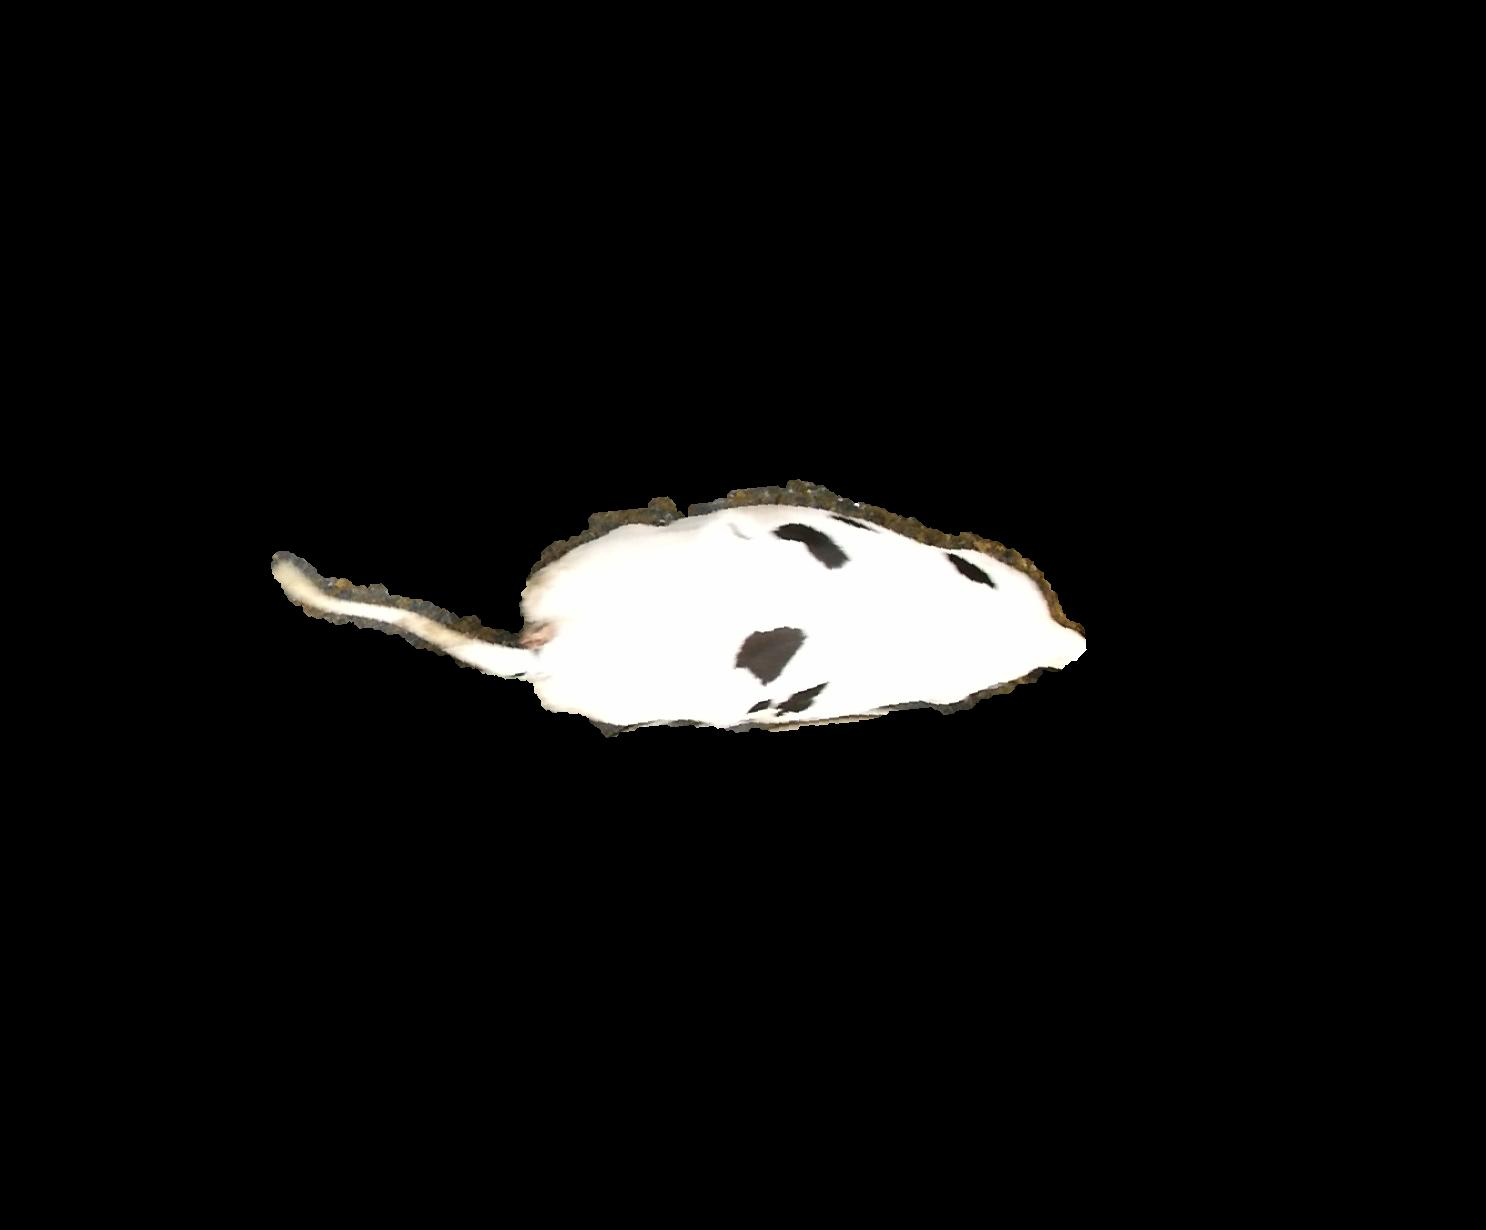

In [60]:
im